# задание №1

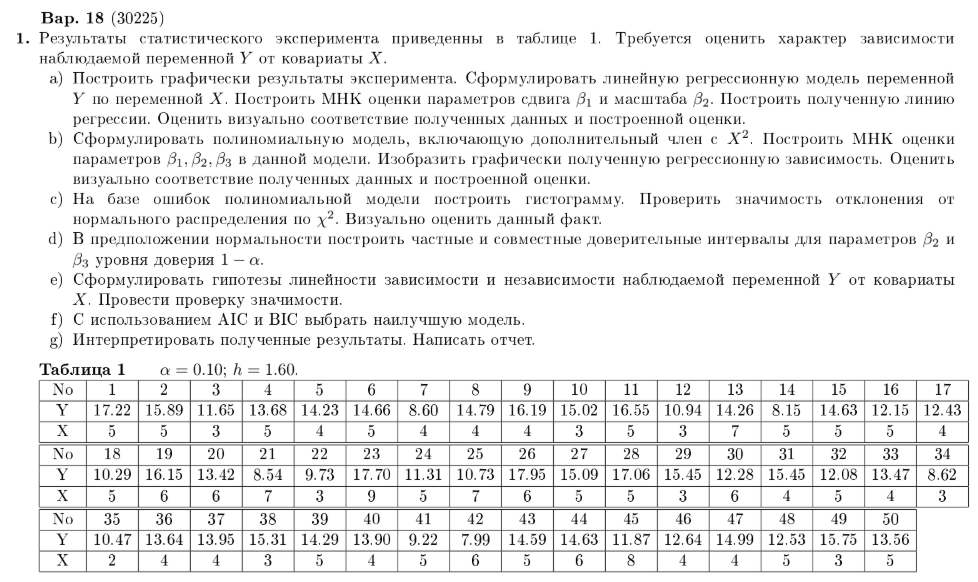

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
sns.set_style("whitegrid")

alpha = 0.10
h = 1.60

Y_data = [
    17.22, 15.89, 11.65, 13.68, 14.23, 14.66, 8.60, 14.79, 16.19, 15.02, 16.55, 10.94, 14.26, 8.15, 14.63, 12.15, 12.43,
    10.29, 16.15, 13.42, 8.54, 9.73, 17.70, 11.31, 10.73, 17.95, 15.09, 17.06, 15.45, 12.28, 15.45, 12.08, 13.47, 8.62,
    10.47, 13.64, 13.95, 15.31, 14.29, 13.90, 9.22, 7.99, 14.59, 14.63, 11.87, 12.64, 14.99, 12.53, 15.75, 13.56
]

X_data = [
    5, 5, 3, 5, 4, 5, 4, 4, 4, 3, 5, 3, 7, 5, 5, 5, 4,
    5, 6, 6, 7, 3, 9, 5, 7, 6, 5, 5, 3, 6, 4, 5, 4, 3,
    2, 4, 4, 3, 5, 4, 5, 6, 5, 6, 8, 4, 4, 5, 3, 5
]

df = pd.DataFrame({
    'X': X_data,
    'Y': Y_data
})

## Пункт a

Оценки параметров модели:
Параметр сдвига (beta_1): 12.5457
Параметр масштаба (beta_2): 0.1614

Полная сводка по модели:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3447
Date:                Wed, 03 Dec 2025   Prob (F-statistic):              0.560
Time:                        19:21:34   Log-Likelihood:                -118.70
No. Observations:                  50   AIC:                             241.4
Df Residuals:                      48   BIC:                             245.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

C:\Users\tem\AppData\Local\Temp\ipykernel_25848\377273330.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


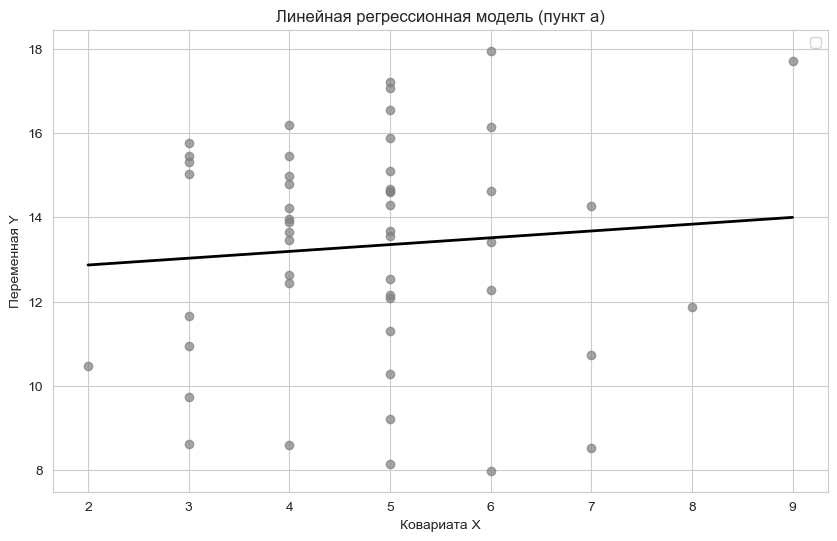

In [12]:
X_const = sm.add_constant(df['X'])

model_linear = sm.OLS(df['Y'], X_const).fit()

print("Оценки параметров модели:")
print(f"Параметр сдвига (beta_1): {model_linear.params['const']:.4f}")
print(f"Параметр масштаба (beta_2): {model_linear.params['X']:.4f}")
print("\nПолная сводка по модели:")
print(model_linear.summary())

plt.figure(figsize=(10, 6))

plt.scatter(df['X'], df['Y'], alpha=0.7, color='grey')

X_plot = np.linspace(df['X'].min(), df['X'].max(), 100)
X_plot_const = sm.add_constant(X_plot)
Y_pred = model_linear.predict(X_plot_const)

plt.plot(X_plot, Y_pred, color='black', linewidth=2)

plt.title('Линейная регрессионная модель (пункт а)')
plt.xlabel('Ковариата X')
plt.ylabel('Переменная Y')
plt.legend()
plt.grid(True)
plt.show()


## Пункт b

Оценки параметров модели (b):
beta_1 (const): 11.9441
beta_2 (X):     0.4108
beta_3 (X^2):   -0.0239




C:\Users\tem\AppData\Local\Temp\ipykernel_25848\319426583.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


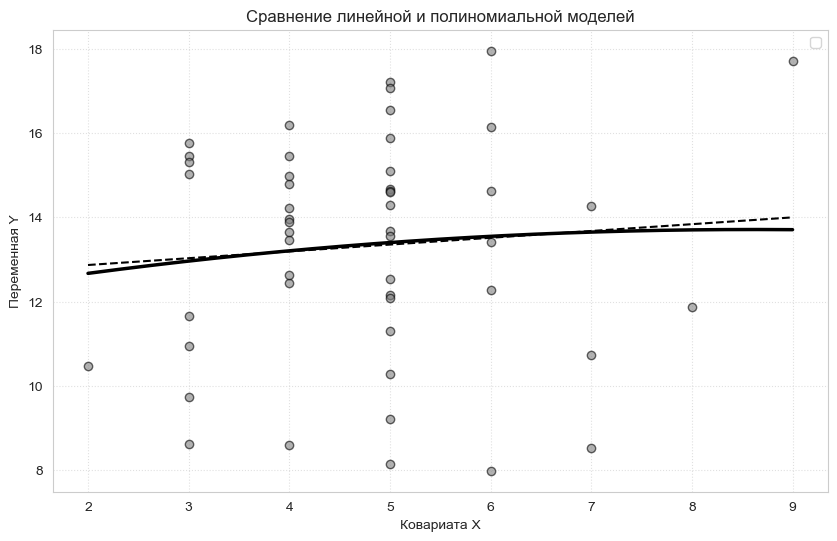

In [ ]:
X_const = sm.add_constant(df['X'])
model_linear = sm.OLS(df['Y'], X_const).fit()

df['X2'] = df['X'] ** 2
X_poly = sm.add_constant(df[['X', 'X2']])
model_poly = sm.OLS(df['Y'], X_poly).fit()

print("Оценки параметров модели (b):")
print(f"beta_1 (const): {model_poly.params['const']:.4f}")
print(f"beta_2 (X):     {model_poly.params['X']:.4f}")
print(f"beta_3 (X^2):   {model_poly.params['X2']:.4f}")
print("\n" + "="*40 + "\n")

plt.figure(figsize=(10, 6))

plt.scatter(df['X'], df['Y'], color='gray', alpha=0.6, edgecolors='black')

X_range = np.linspace(df['X'].min(), df['X'].max(), 200)

Y_lin_pred = model_linear.params['const'] + model_linear.params['X'] * X_range
plt.plot(X_range, Y_lin_pred, color='black', linestyle='--', linewidth=1.5)

Y_poly_pred = model_poly.params['const'] + model_poly.params['X'] * X_range + model_poly.params['X2'] * (X_range**2)
plt.plot(X_range, Y_poly_pred, color='black', linestyle='-', linewidth=2.5)

plt.title('Сравнение линейной и полиномиальной моделей')
plt.xlabel('Ковариата X')
plt.ylabel('Переменная Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)


## Пункт C

Гистограмма ошибок

C:\Users\tem\AppData\Local\Temp\ipykernel_25848\1879201773.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


(-6.558923937529125, 5.4010760624708745)

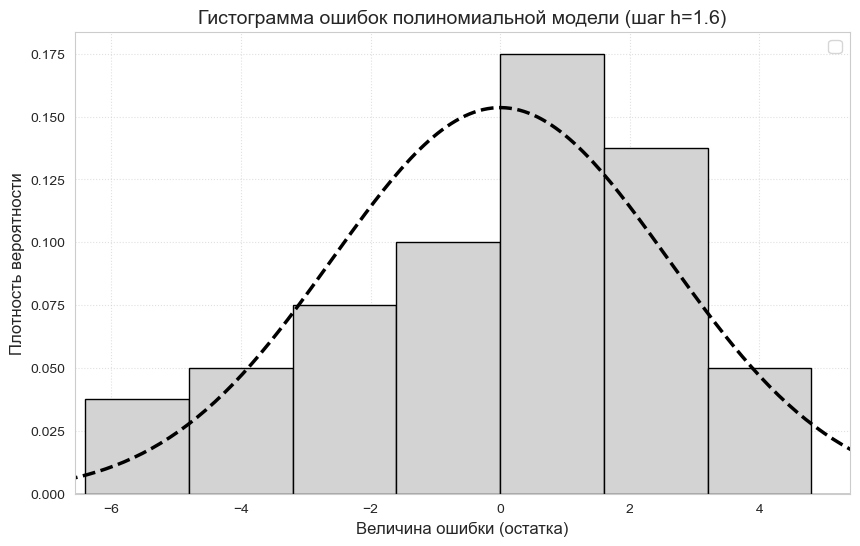

In [27]:
residuals = model_poly.resid
n = len(residuals)


plt.figure(figsize=(10, 6))

mu_hat, sigma_hat = stats.norm.fit(residuals)

max_abs = max(abs(residuals.min()), abs(residuals.max()))
num_steps = int(np.ceil(max_abs / h))

bins_grid = np.arange(-(num_steps+1)*h, (num_steps+2)*h, h)

plt.hist(residuals, bins=bins_grid, density=True, color='lightgray', edgecolor='black')

x_plot = np.linspace(min(residuals)-2, max(residuals)+2, 200)
pdf_plot = stats.norm.pdf(x_plot, mu_hat, sigma_hat)
plt.plot(x_plot, pdf_plot, 'k--', linewidth=2.5)

plt.title(f'Гистограмма ошибок полиномиальной модели (шаг h={h})', fontsize=14)
plt.xlabel('Величина ошибки (остатка)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(min(residuals)-1, max(residuals)+1)


Рассчет критерия Пирсона с объединением интервалов


--- Расчет критерия Пирсона с объединением интервалов ---


C:\Users\tem\AppData\Local\Temp\ipykernel_25848\3966232174.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


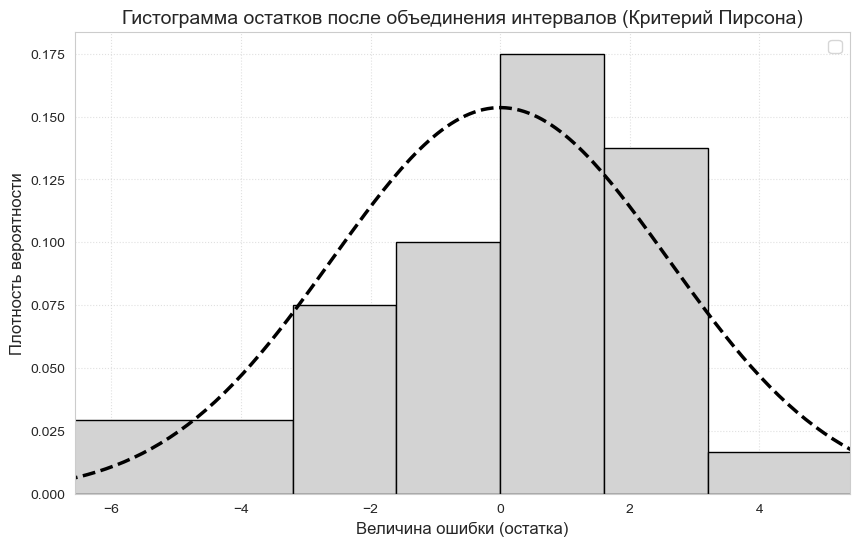

Интервал                       Obs        Exp       
-------------------------------------------------------
[ -8.000;  -3.200)            7          5.410
[ -3.200;  -1.600)            6          8.015
[ -1.600;  -0.000)            8          11.575
[ -0.000;   1.600)            14         11.575
[  1.600;   3.200)            11         8.015
[  3.200;   8.000)            4          5.410
-------------------------------------------------------
Chi2 statistic: 4.0653
Degrees of freedom: 3
Critical value (alpha=0.1): 6.2514
P-value: 0.2545

ВЫВОД: Гипотеза о нормальности остатков ПРИНИМАЕТСЯ.


In [ ]:
observed_counts, bin_edges = np.histogram(residuals, bins=bins_grid)

cdf_vals = stats.norm.cdf(bin_edges, mu_hat, sigma_hat)
probs = np.diff(cdf_vals)

probs = probs / probs.sum()
expected_counts = probs * n

min_expected = 5.0

merged_obs = []
merged_exp = []
merged_intervals = []

current_o = 0
current_e = 0
start_edge = bin_edges[0]

for i in range(len(observed_counts)):
    current_o += observed_counts[i]
    current_e += expected_counts[i]
    
    if current_e >= min_expected:
        merged_obs.append(current_o)
        merged_exp.append(current_e)
        merged_intervals.append((start_edge, bin_edges[i+1]))

        current_o = 0
        current_e = 0
        start_edge = bin_edges[i+1]

if current_e > 0:
    if len(merged_exp) > 0:
        merged_obs[-1] += current_o
        merged_exp[-1] += current_e
        prev_start, _ = merged_intervals[-1]
        merged_intervals[-1] = (prev_start, bin_edges[i+1])
    else:
        merged_obs.append(current_o)
        merged_exp.append(current_e)
        merged_intervals.append((start_edge, bin_edges[i+1]))

merged_obs = np.array(merged_obs)
merged_exp = np.array(merged_exp)

plt.figure(figsize=(10, 6))

widths = []
centers = []
densities = []

for (start, end), count in zip(merged_intervals, merged_obs):
    width = end - start
    widths.append(width)
    centers.append((start + end) / 2)
    densities.append(count / (n * width))

plt.bar(centers, densities, width=widths, align='center',
        color='lightgray', edgecolor='black')

x_plot = np.linspace(min(residuals)-2, max(residuals)+2, 200)
pdf_plot = stats.norm.pdf(x_plot, mu_hat, sigma_hat)
plt.plot(x_plot, pdf_plot, 'k--', linewidth=2.5)

plt.title('Гистограмма остатков после объединения интервалов (Критерий Пирсона)', fontsize=14)
plt.xlabel('Величина ошибки (остатка)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)


plt.xlim(min(residuals)-1, max(residuals)+1)
plt.show()

chi2_stat = np.sum((merged_obs - merged_exp)**2 / merged_exp)

k = len(merged_obs)
p_params = 2
df = k - 1 - p_params

if df <= 0:
    print("ВНИМАНИЕ: Недостаточно степеней свободы для корректного теста (мало интервалов).")
else:

    chi2_crit = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    print(f"{'Интервал':<30} {'Obs':<10} {'Exp':<10}")
    print("-" * 55)
    for (a, b), o, e in zip(merged_intervals, merged_obs, merged_exp):
        print(f"[{a:7.3f}; {b:7.3f}) {'':<10} {int(o):<10} {e:.3f}")
    print("-" * 55)
    
    print(f"Chi2 statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {df}")
    print(f"Critical value (alpha={alpha}): {chi2_crit:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if chi2_stat < chi2_crit:
        print("\nВЫВОД: Гипотеза о нормальности остатков ПРИНИМАЕТСЯ.")
    else:
        print("\nВЫВОД: Гипотеза о нормальности остатков ОТВЕРГАЕТСЯ.")

## Пункт D

In [ ]:
params = model_poly.params
bse = model_poly.bse
n = int(model_poly.nobs)
p = len(params)
df = n - p
alpha = 0.10

# Квантиль Стьюдента для частных интервалов (1 - alpha/2)
t_crit = stats.t.ppf(1 - alpha/2, df)

# Квантиль Стьюдента для совместных интервалов Бонферрони (1 - alpha/4)
m = 2
t_bonf = stats.t.ppf(1 - alpha/(2*m), df)

print(f"Число степеней свободы df = {df}")
print(f"Уровень значимости alpha = {alpha}")
print("-" * 40)

print("ЧАСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень 1-alpha):")
print(f"t_crit = {t_crit:.4f}")

b2 = params['X']
se2 = bse['X']
ci_b2 = (b2 - t_crit * se2, b2 + t_crit * se2)
print(f"Beta_2: {b2:.4f} +/- {t_crit:.4f}*{se2:.4f}  =>  [{ci_b2[0]:.4f}; {ci_b2[1]:.4f}]")

b3 = params['X2']
se3 = bse['X2']
ci_b3 = (b3 - t_crit * se3, b3 + t_crit * se3)
print(f"Beta_3: {b3:.4f} +/- {t_crit:.4f}*{se3:.4f}  =>  [{ci_b3[0]:.4f}; {ci_b3[1]:.4f}]")

print("-" * 40)

print("СОВМЕСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (Метод Бонферрони, m=2):")
print(f"t_bonf = {t_bonf:.4f} (квантиль для 1 - {alpha}/4)")

ci_bonf_b2 = (b2 - t_bonf * se2, b2 + t_bonf * se2)
print(f"Beta_2: [{ci_bonf_b2[0]:.4f}; {ci_bonf_b2[1]:.4f}]")

ci_bonf_b3 = (b3 - t_bonf * se3, b3 + t_bonf * se3)
print(f"Beta_3: [{ci_bonf_b3[0]:.4f}; {ci_bonf_b3[1]:.4f}]")


Число степеней свободы df = 47
Уровень значимости alpha = 0.1
----------------------------------------
ЧАСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень 1-alpha):
t_crit = 1.6779
Beta_2: 0.4108 +/- 1.6779*1.4099  =>  [-1.9549; 2.7765]
Beta_3: -0.0239 +/- 1.6779*0.1324  =>  [-0.2460; 0.1983]
----------------------------------------
СОВМЕСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (Метод Бонферрони, m=2):
t_bonf = 2.0117 (квантиль для 1 - 0.1/4)
Beta_2: [-2.4255; 3.2472]
Beta_3: [-0.2902; 0.2424]


# ЗАДАНИЕ 2
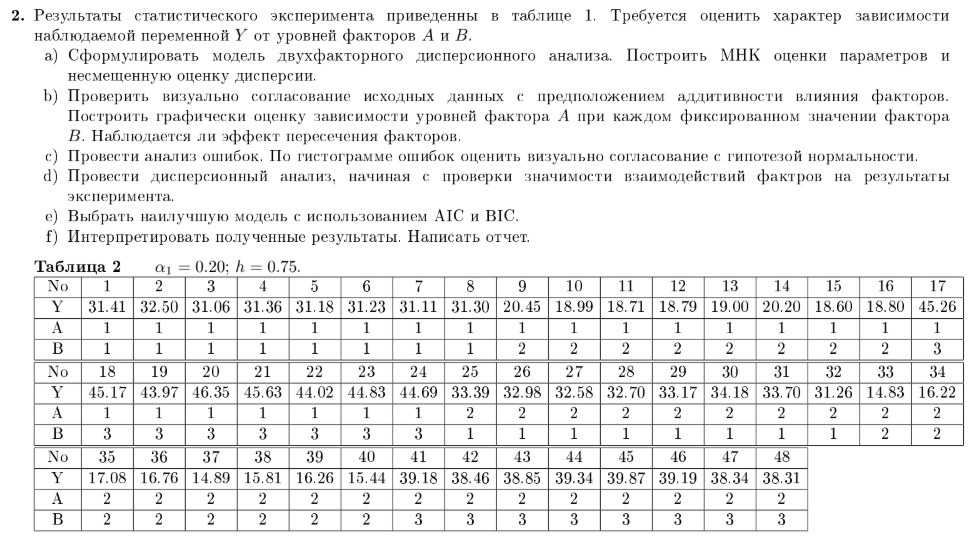

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

alpha1 = 0.20
h = 0.75

Y_data = [
    31.41, 32.50, 31.06, 31.36, 31.18, 31.23, 31.11, 31.30, 20.45, 18.99,
    18.71, 18.79, 19.00, 20.20, 18.60, 18.80, 45.26, 45.17, 43.97, 46.35,
    45.63, 44.02, 44.83, 44.69, 33.39, 32.98, 32.58, 32.70, 33.17, 34.18,
    33.70, 31.26, 14.83, 16.22, 17.08, 16.76, 14.89, 15.81, 16.26, 15.44,
    39.18, 38.46, 38.85, 39.34, 39.87, 39.19, 38.34, 38.31
]

A_factor = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
]

B_factor = [
    1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
    3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
    2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3
]

df_anova = pd.DataFrame({
    'Y': Y_data,
    'A': A_factor,
    'B': B_factor
})

df_anova['A'] = df_anova['A'].astype('category')
df_anova['B'] = df_anova['B'].astype('category')

print("Данные для дисперсионного анализа:")
print(df_anova.head())
print("\nИнформация о типах данных:")
print(df_anova.info())


Данные для дисперсионного анализа:
       Y  A  B
0  31.41  1  1
1  32.50  1  1
2  31.06  1  1
3  31.36  1  1
4  31.18  1  1

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       48 non-null     float64 
 1   A       48 non-null     category
 2   B       48 non-null     category
dtypes: category(2), float64(1)
memory usage: 868.0 bytes
None


## Пункт A

In [ ]:

model_anova = ols('Y ~ C(A) * C(B)', data=df_anova).fit()

print("=== МНК-оценки параметров модели ===")
print(model_anova.params)

mse = model_anova.mse_resid
print(f"\nНесмещенная оценка дисперсии (s^2): {mse:.4f}")

print("\n=== Сводка по модели ===")
print(model_anova.summary())


=== МНК-оценки параметров модели ===
Intercept              31.39375
C(A)[T.2]               1.60125
C(B)[T.2]             -12.20125
C(B)[T.3]              13.59625
C(A)[T.2]:C(B)[T.2]    -4.88250
C(A)[T.2]:C(B)[T.3]    -7.64875
dtype: float64

Несмещенная оценка дисперсии (s^2): 0.5186

=== Сводка по модели ===
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1940.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.66e-48
Time:                        14:49:21   Log-Likelihood:                -49.144
No. Observations:                  48   AIC:                             110.3
Df Residuals:                      42   BIC:                             121.5
Df Model:                           5                 

## Пункт B

C:\Users\tem\AppData\Local\Temp\ipykernel_25848\4252107464.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_means = df_anova.groupby(['A', 'B'])['Y'].mean().reset_index()


=== Средние значения Y для комбинаций факторов A и B ===
   A  B    Mean_Y
0  1  1  31.39375
1  1  2  19.19250
2  1  3  44.99000
3  2  1  32.99500
4  2  2  15.91125
5  2  3  38.94250


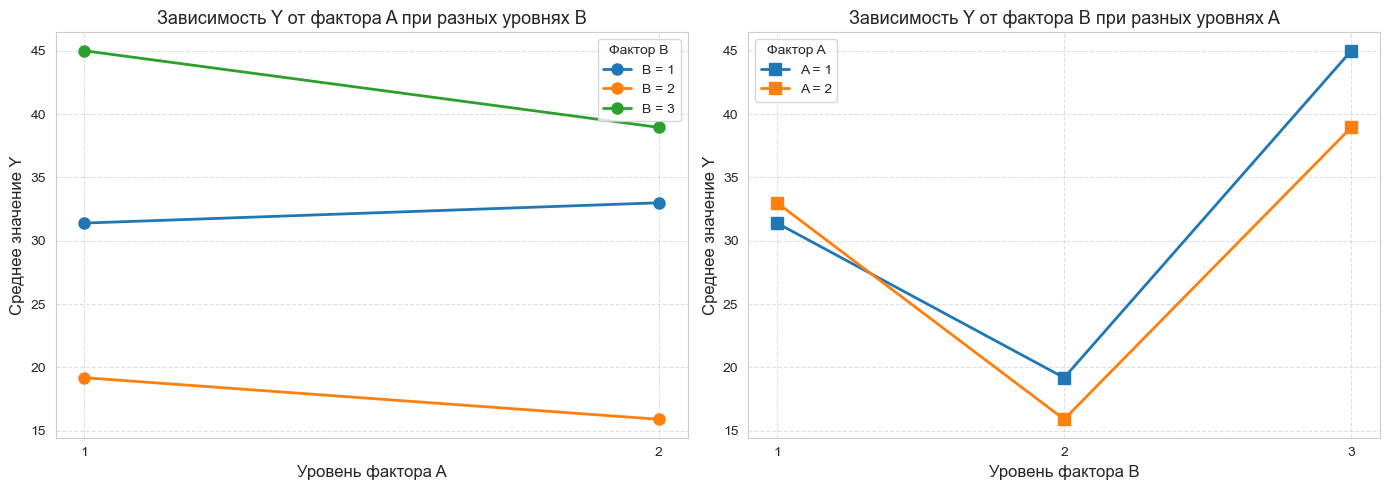


=== Интерпретация ===
Если линии на графиках параллельны (не пересекаются), то взаимодействия нет,
и факторы действуют аддитивно: Y = mu + alpha_i + beta_j + epsilon.
Если линии пересекаются или значительно расходятся, это указывает на наличие
взаимодействия (эффекта пересечения факторов): требуется член (alpha*beta)_ij.
